In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os ,shutil

In [ ]:
path = 'drive/MyDrive/lung_cancer_dataset/'
negitive = 'drive/MyDrive/lung_cancer_dataset/negitive/'
positive = 'drive/MyDrive/lung_cancer_dataset/positive/'
train_pos = 'drive/MyDrive/lung_cancer_dataset/train/positive/'
train_neg = 'drive/MyDrive/lung_cancer_dataset/train/negitive/'
test_pos= 'drive/MyDrive/lung_cancer_dataset/test/positive/'
test_neg= 'drive/MyDrive/lung_cancer_dataset/test/negitive/'

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
image = load_img('/content/drive/MyDrive/lung_cancer_dataset/nagative/person100_bacteria_479.jpeg')

In [ ]:
img_arr = img_to_array(image)
print (f"Image Dimensions are: {img_arr.ndim}")
print (f"Imageshape is: {img_arr.shape}")

Image Dimensions are: 3
Imageshape is: (552, 904, 3)


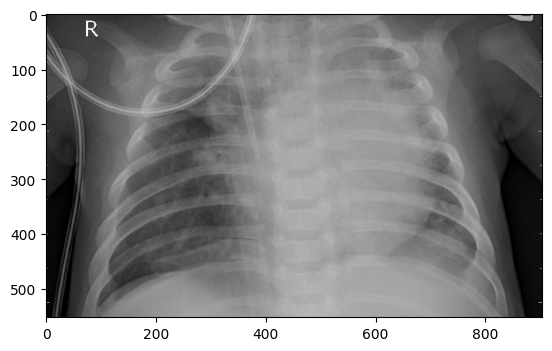

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap= plt.cm.binary)
plt.show()

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 128)     

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                                'drive/MyDrive/lung_cancer_dataset/train/',
                                target_size=(200, 200),
                                batch_size=20,
                                class_mode='binary')

Found 360 images belonging to 2 classes.


In [ ]:
train_generator[0]

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    )

<ipython-input-154-e9622a63ee8d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
18/18 [==============================] - 73s 4s/step - loss: 0.6943 - acc: 0.5889
Epoch 2/10
18/18 [==============================] - 42s 2s/step - loss: 0.6377 - acc: 0.6667
Epoch 3/10
18/18 [==============================] - 43s 2s/step - loss: 0.5361 - acc: 0.7917
Epoch 4/10
18/18 [==============================] - 42s 2s/step - loss: 0.4555 - acc: 0.8250
Epoch 5/10
18/18 [==============================] - 43s 2s/step - loss: 0.3927 - acc: 0.8278
Epoch 6/10
18/18 [==============================] - 44s 2s/step - loss: 0.3404 - acc: 0.8444
Epoch 7/10
18/18 [==============================] - 44s 2s/step - loss: 0.3081 - acc: 0.8778
Epoch 8/10
18/18 [==============================] - 44s 2s/step - loss: 0.2869 - acc: 0.8750
Epoch 9/10
18/18 [==============================] - 44s 2s/step - loss: 0.2844 - acc: 0.8833
Epoch 10/10
18/18 [==============================] - 44s 2s/step - loss: 0.2409 - acc: 0.9028


In [ ]:
test_generator = test_datagen.flow_from_directory(
                                'drive/MyDrive/lung_cancer_dataset/test/',
                                target_size=(200, 200),
                                batch_size=20,
                                class_mode='binary')

Found 174 images belonging to 2 classes.


In [ ]:
test_generator.shape

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
history = model.fit_generator(
    test_generator,
    epochs=10,
    )

<ipython-input-157-26e654b38c41>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
9/9 [==============================] - 22s 2s/step - loss: 0.4139 - acc: 0.8218
Epoch 2/10
9/9 [==============================] - 41s 5s/step - loss: 0.2957 - acc: 0.8678
Epoch 3/10
9/9 [==============================] - 33s 4s/step - loss: 0.2368 - acc: 0.9195
Epoch 4/10
9/9 [==============================] - 22s 2s/step - loss: 0.1763 - acc: 0.9368
Epoch 5/10
9/9 [==============================] - 23s 2s/step - loss: 0.2153 - acc: 0.8966
Epoch 6/10
9/9 [==============================] - 22s 2s/step - loss: 0.1947 - acc: 0.9253
Epoch 7/10
9/9 [==============================] - 21s 2s/step - loss: 0.1987 - acc: 0.9368
Epoch 8/10
9/9 [==============================] - 21s 2s/step - loss: 0.1564 - acc: 0.9483
Epoch 9/10
9/9 [==============================] - 26s 3s/step - loss: 0.1619 - acc: 0.9368
Epoch 10/10
9/9 [==============================] - 21s 2s/step - loss: 0.1549 - acc: 0.9483


In [ ]:
y_pred = model.predict(test_generator)

9/9 [==============================] - 9s 875ms/step


In [ ]:
y_pred

array([[9.98227656e-01],
       [5.67458160e-02],
       [8.01259816e-01],
       [9.88261998e-01],
       [1.29686715e-02],
       [2.75109429e-03],
       [9.92022574e-01],
       [9.99107003e-01],
       [9.32900250e-01],
       [1.31578203e-02],
       [8.07659864e-01],
       [1.07711814e-02],
       [9.93857980e-01],
       [9.99153435e-01],
       [3.03752534e-02],
       [6.58446193e-01],
       [5.31140668e-03],
       [2.03011162e-03],
       [9.68791962e-01],
       [1.12753756e-01],
       [1.12573709e-02],
       [9.92616773e-01],
       [9.48790312e-01],
       [1.27379417e-01],
       [9.89258826e-01],
       [4.43324959e-03],
       [9.82034028e-01],
       [9.93621111e-01],
       [2.38071028e-02],
       [3.34199630e-02],
       [9.92194951e-01],
       [9.71869409e-01],
       [9.92886484e-01],
       [5.02944067e-02],
       [2.60278702e-01],
       [8.33560228e-02],
       [9.91517246e-01],
       [1.41357211e-03],
       [9.98560667e-01],
       [3.19615297e-04],


In [ ]:
y_pred = [1 if y>0.5 else 0 for y in y_pred]
y_pred

[1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1]

In [ ]:
test_labels=test_generator.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
report = classification_report(test_labels, (y_pred))
print(report)

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       100
           1       0.44      0.47      0.45        74

    accuracy                           0.52       174
   macro avg       0.51      0.51      0.51       174
weighted avg       0.52      0.52      0.52       174



In [ ]:
confusion = confusion_matrix(test_labels, y_pred)
confusion

array([[55, 45],
       [39, 35]])

<Axes: >

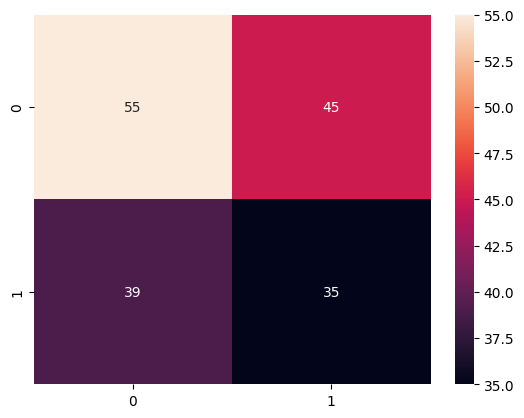

In [ ]:
import seaborn as sns
sns.heatmap(confusion, annot=True)